### 准备Python运行环境

In [ ]:
# 如果未安装 python 环境和相关库，请先运行
# 如果已经成功安装，不需要运行
! pip install networkx
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [1]:
# 自动屏蔽不必要的报错信息
import warnings
warnings.filterwarnings("ignore")

# 导入相关库
from collections import Counter
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import networkx as nx

### Zachary 空手道俱乐部

In [6]:
G_karate = nx.karate_club_graph()
print(nx.info(G_karate))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


### 节点中心性可视化

In [7]:
def scale_centrality(centrality):
    c_max = max(centrality)
    c_min = min(centrality)
    centrality = [(c-c_min)/(c_max-c_min) for c in centrality]
    return centrality

In [8]:
def plot_network_centrality(G, centrality, title, scale=True):
    
    fig, axes = plt.subplots(figsize=(16, 8), nrows=1, ncols=2, gridspec_kw={'width_ratios': [3, 1.2]})
    
    pos = nx.fruchterman_reingold_layout(G, seed=8)
    d = dict(G.degree)
    
    nx.draw(G, pos=pos, node_size=[v * 80 for v in d.values()], 
            node_color=centrality, cmap=plt.cm.Blues, with_labels=True, ax=axes[0])
    axes[0].set_title('Centralities on Zachary\'s Karate Club')

    sns.set_theme(style="whitegrid")
    if scale:
        centrality = scale_centrality(centrality)  # scale to 0-1
    data = pd.DataFrame({'name': [str(i) for i in range(len(G))],
                         'centrality': centrality})
    sns.barplot(x='centrality', y='name', data=data, color='b', ax=axes[1])
    axes[1].set_title(f'Distribution of Node centrality: {title}')

    plt.show()

In [9]:
# 本节课的重点，构造不同的 centrality 列表
centrality = [1]*6 + [2]*6 + [3]*6 + [4]*6+ [5]*6 + [6]*4
print(centrality)

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6]


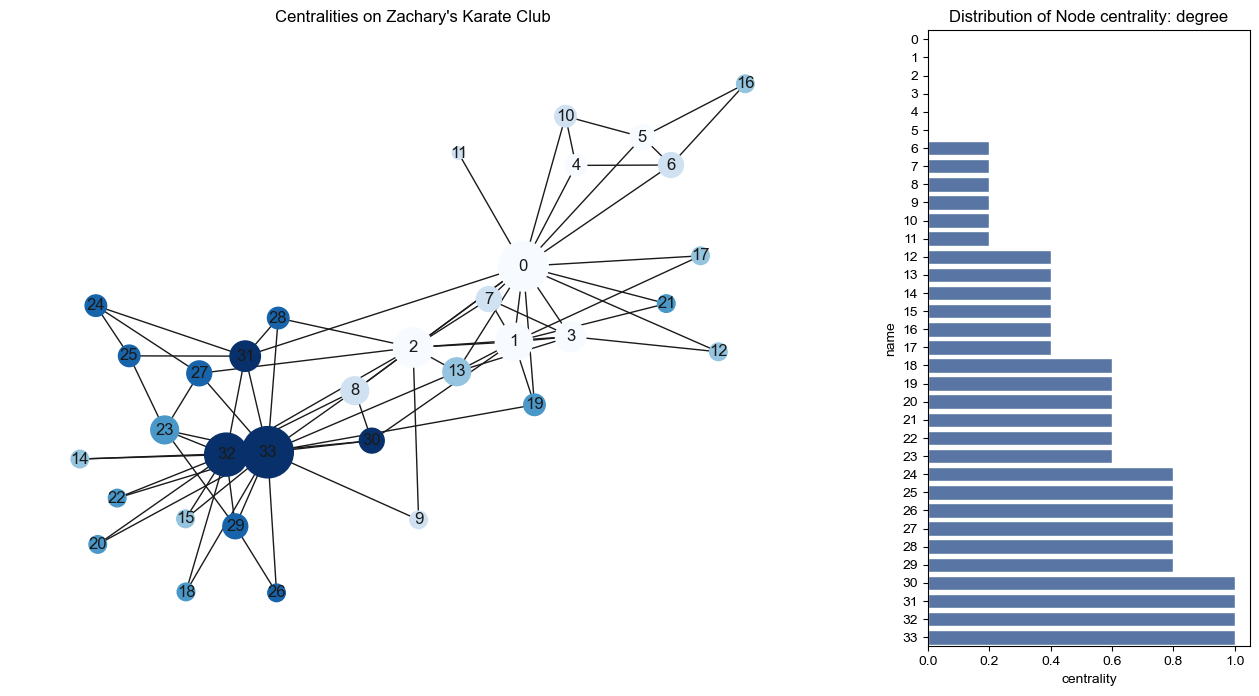

In [10]:
plot_network_centrality(G=G_karate, centrality=centrality, title='degree')

### Degree centrality 度中心性

In [9]:
c_degree = [d for n, d in G_karate.degree()]

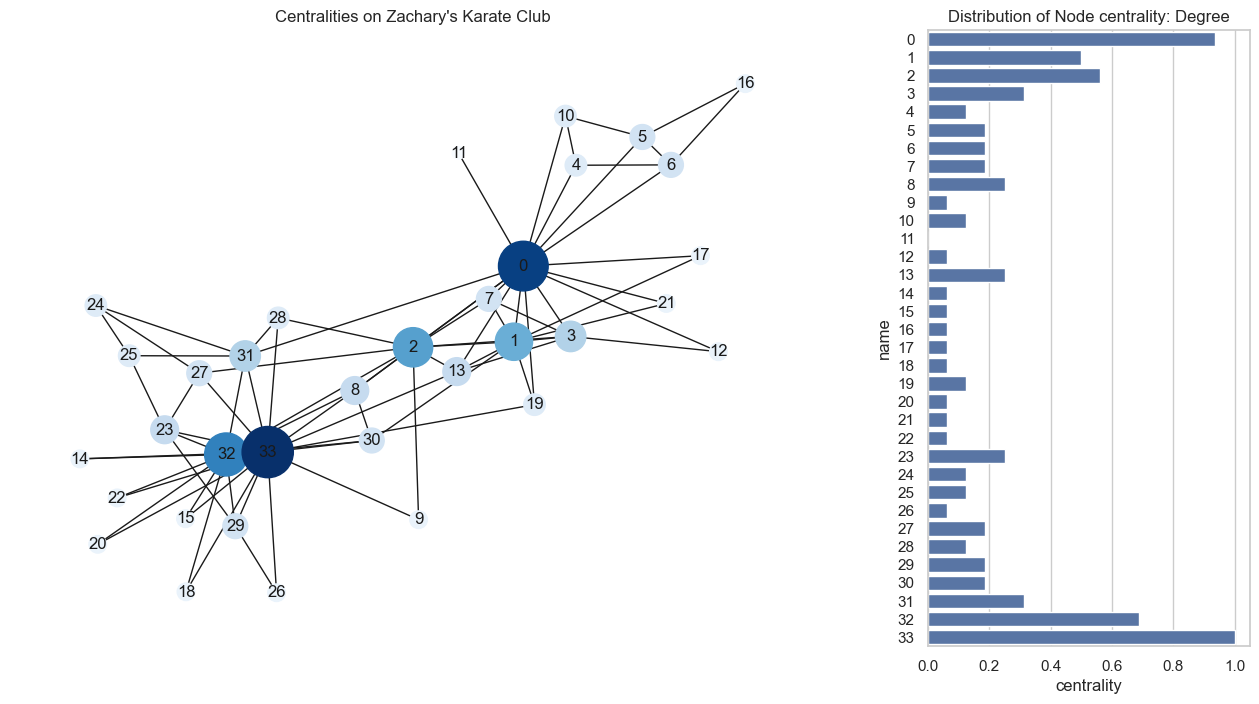

In [10]:
plot_network_centrality(G=G_karate, centrality=c_degree, title='Degree')

### LocalRank centrality 半局部中心性

$$
\operatorname{LocalRank}(i)=\sum_{j \in \Gamma(i)} N(j)
$$

In [11]:
def LocalRank(G):

    LR = []
    N = G.degree  # a dict

    for i in G.nodes():
        lr = 0
        neigh_i = G.neighbors(i)
        for j in neigh_i:
            lr += N[j]
        LR.append(lr)
    
    return LR

In [12]:
c_localrank = LocalRank(G_karate)

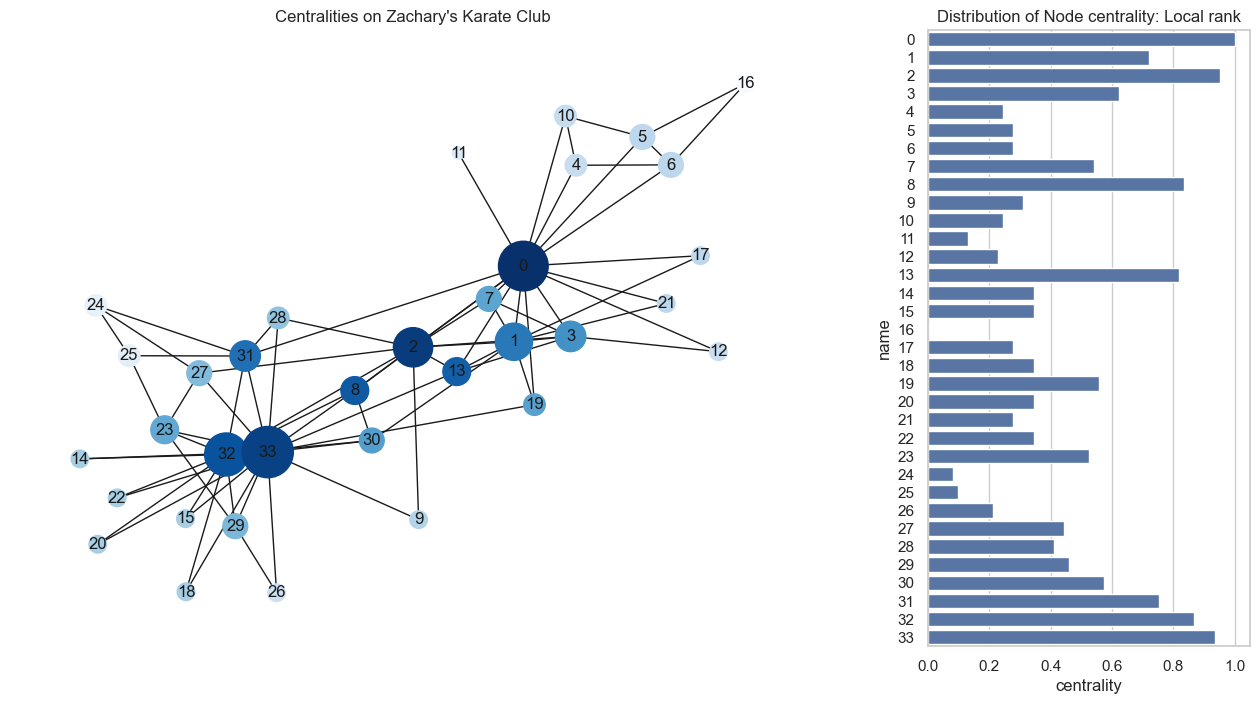

In [13]:
plot_network_centrality(G=G_karate, centrality=c_localrank, title='Local rank')

### Clustering centrality 集聚系数中心性

In [14]:
def Clustering(G):
    return list(nx.clustering(G).values())

In [15]:
c_clustering = Clustering(G_karate)

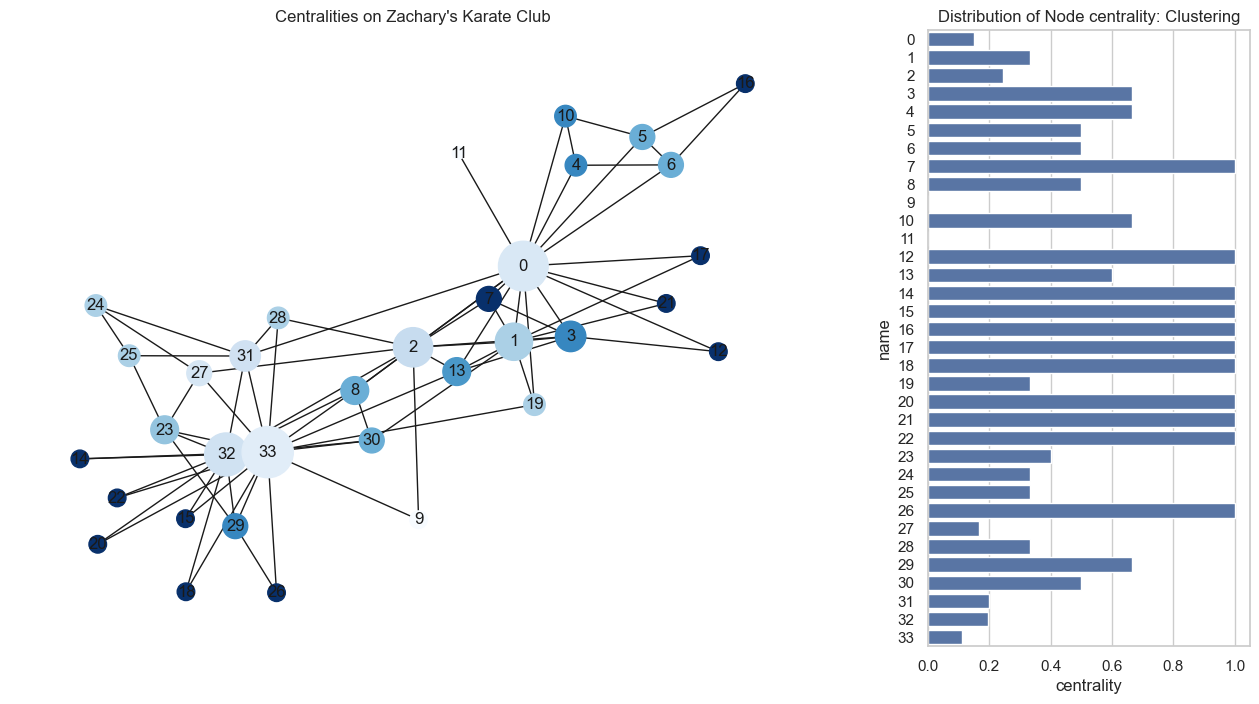

In [16]:
plot_network_centrality(G=G_karate, centrality=c_clustering, title='Clustering')

### Corness centrality K 核中心性

In [17]:
def Corness(G):
    return list(nx.core_number(G).values())

In [18]:
c_corness = Corness(G_karate)

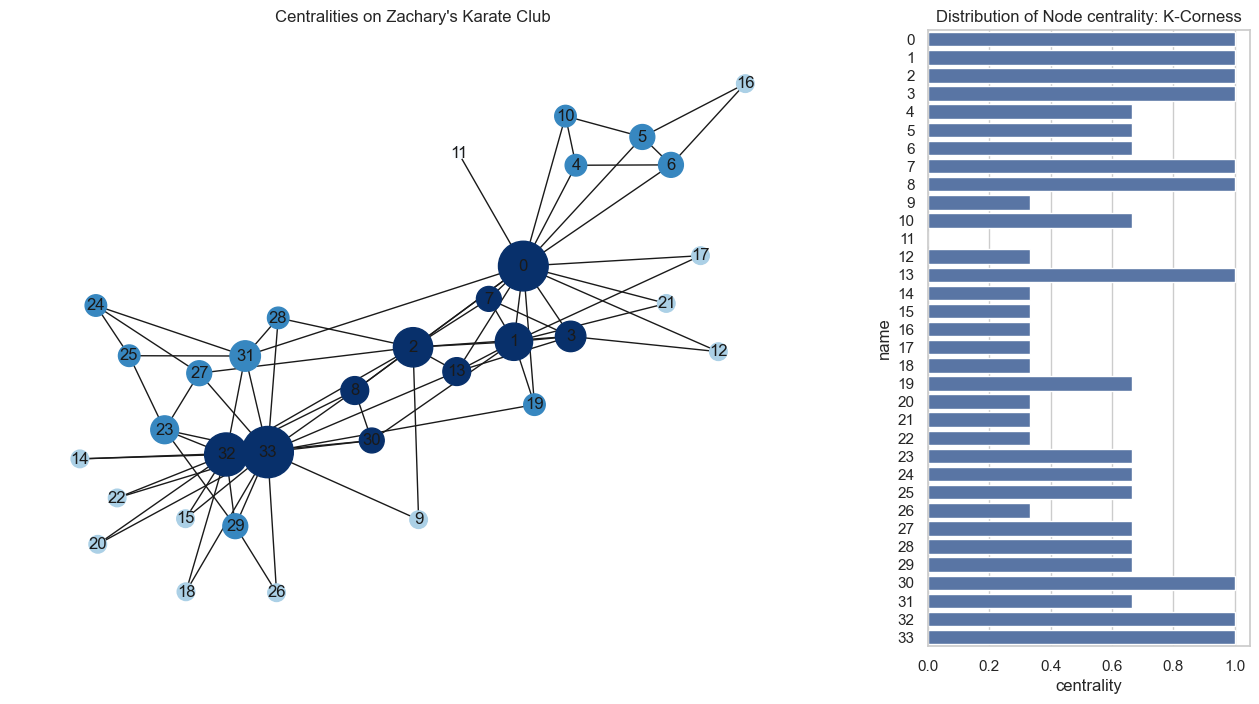

In [19]:
plot_network_centrality(G=G_karate, centrality=c_corness, title='K-Corness')

### Closeness centrality 接近度中心性

$$C_{i}=\frac{n}{\sum_{j} d_{i j}}$$

In [20]:
def Closeness(G):
    closeness_centrality = []
    n = len(G)
    for i in G.nodes():
        sp = list(nx.single_source_shortest_path_length(G, i).values())
        closeness_centrality.append((n-1) / sum(sp))
        
    return closeness_centrality

In [21]:
c_closeness = Closeness(G_karate)

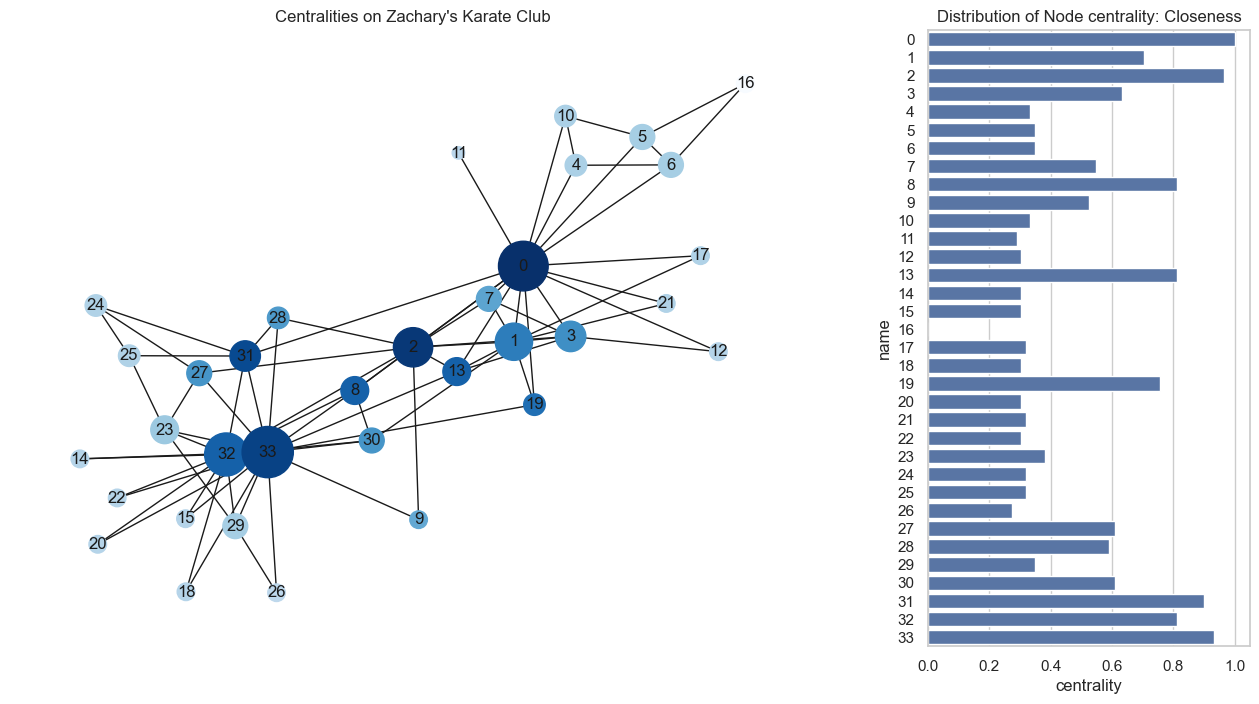

In [22]:
plot_network_centrality(G=G_karate, centrality=c_closeness, title='Closeness')

### Betweenness centrality 介数中心性

In [23]:
def Betweenness(G):
    return list(nx.betweenness_centrality(G).values())

In [24]:
c_betweenness = Betweenness(G_karate)

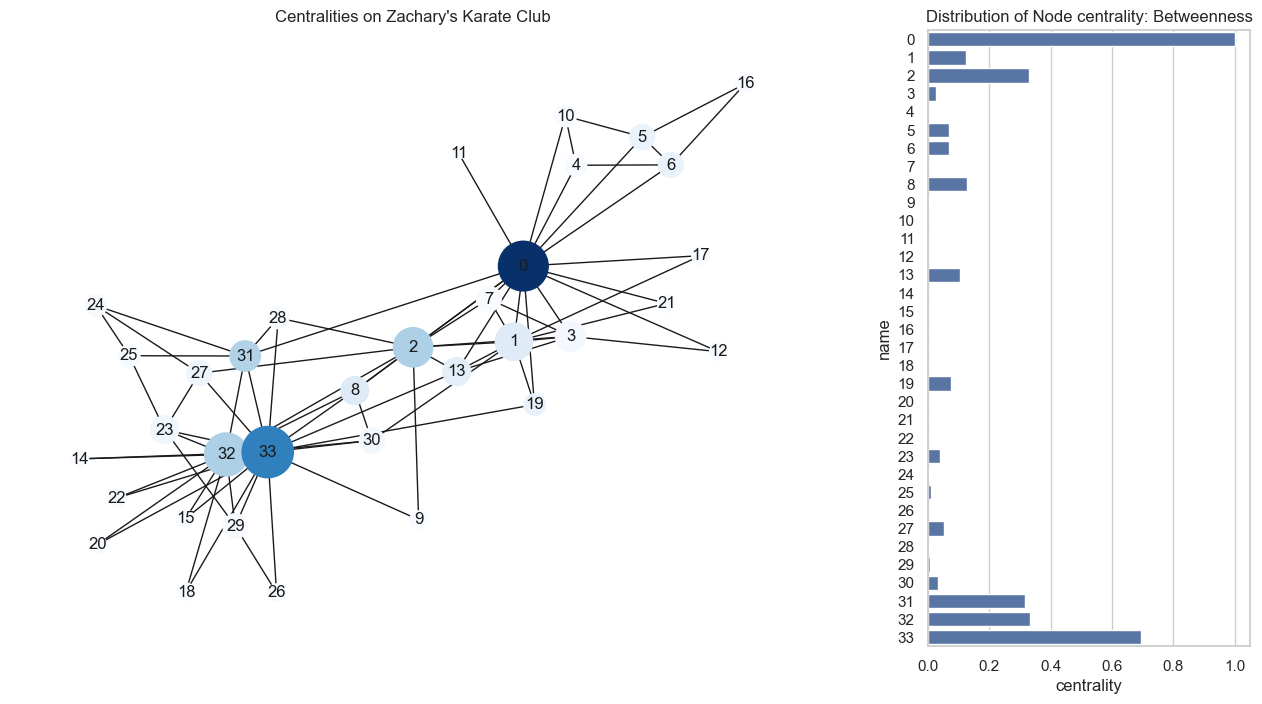

In [25]:
plot_network_centrality(G=G_karate, centrality=c_betweenness, title='Betweenness')

### Eigenvector centrality 特征向量中心性

$$
Ax = \lambda x
$$

In [26]:
def Eigenvector1(G):
    """
    get the largest eigenvector centrality of network G
    """
    m = nx.to_numpy_array(G)
    vals, vecs = np.linalg.eigh(m)
    vec1 = vecs.T[np.argmax(vals)]

    return vec1

In [27]:
c_eigenvector1 = Eigenvector1(G_karate)

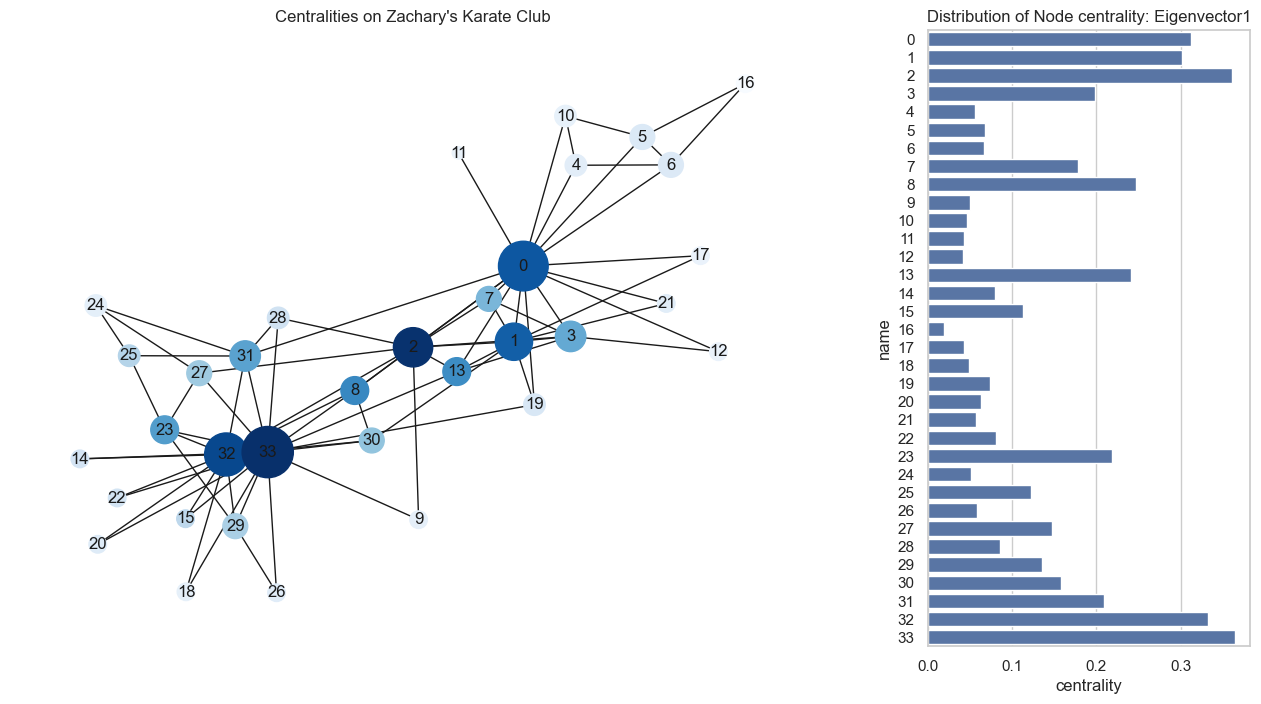

In [28]:
plot_network_centrality(G=G_karate, centrality=c_eigenvector1, title='Eigenvector1', scale=False)

### Katz centrality

$$
\mathbf{x}=\alpha \mathbf{A} \mathbf{x}+\beta \mathbf{1}
\\
\mathbf{x}=\beta(\mathbf{I}-\alpha \mathbf{A})^{-1} \mathbf{1}
$$
其中， $0 < \alpha < \ 1/\lambda_1$

In [32]:
def Katz1(G):
    """get Katz centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    e = np.linalg.eigvalsh(m)
    max1, max2 = sorted(e, reverse=True)[:2]

    katz_centrality = nx.katz_centrality(G, 1 / max1 - 0.01)

    return list(katz_centrality.values())


def Katz2(G):
    """get Katz centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    e = np.linalg.eigvalsh(m)
    max1, max2 = sorted(e, reverse=True)[:2]
    
    alpha = max2 - 0.01
    katz_centrality = np.dot(np.linalg.inv(np.eye(34)-alpha * m), np.ones(34))

    return katz_centrality

In [33]:
c_Katz1 = Katz1(G_karate)

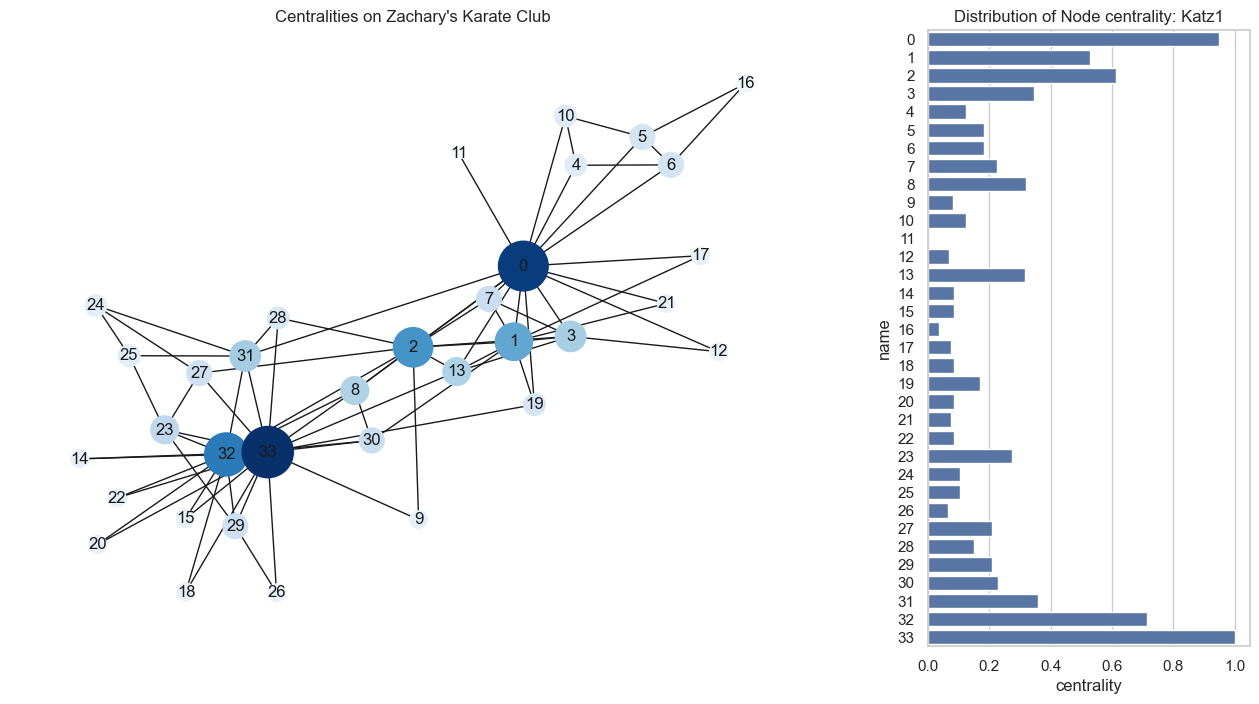

In [34]:
plot_network_centrality(G=G_karate, centrality=c_Katz1, title='Katz1')

### PageRank centrality

In [37]:
def PageRank(G):
    """
    get pagerank centrality of network G
    """
    pr = nx.pagerank(G)

    return list(pr.values())

In [38]:
c_PageRank = PageRank(G_karate)

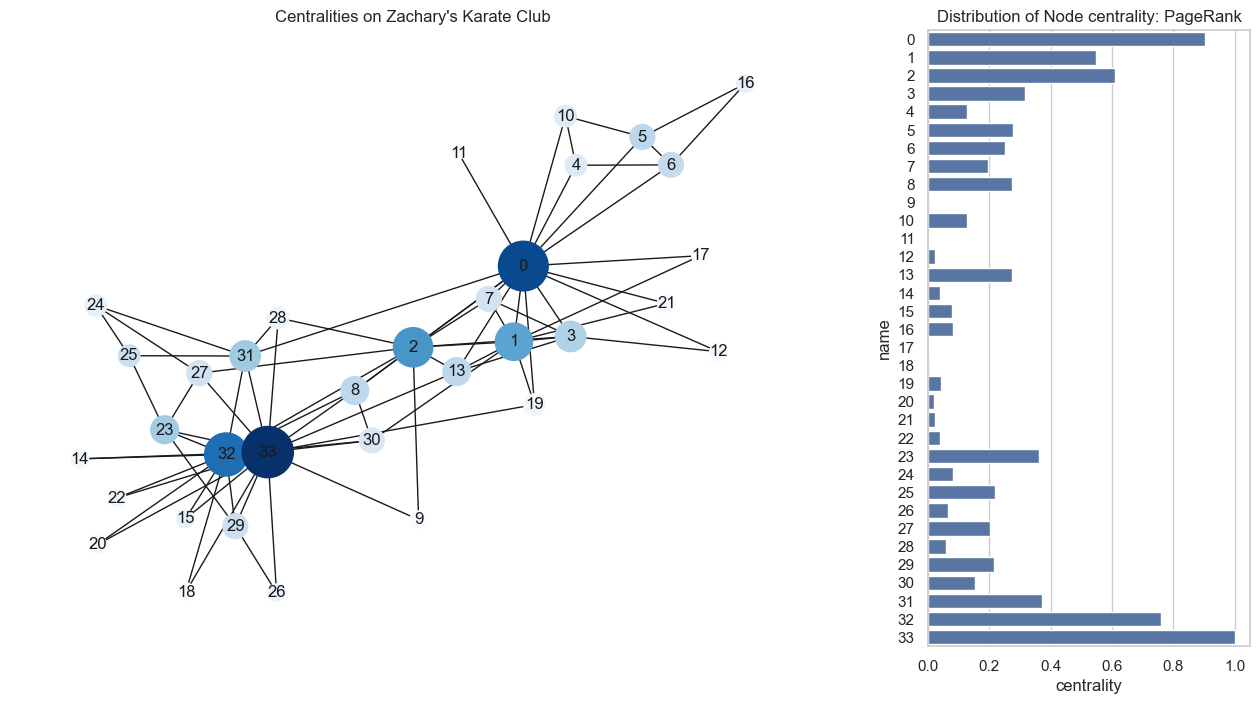

In [39]:
plot_network_centrality(G=G_karate, centrality=c_PageRank, title='PageRank')